In [1]:
import pandas as pd
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
y = data.Survived

In [6]:
x = data[[ 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare',  'Embarked']] 

In [7]:
x.Embarked.unique() 

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
x.loc[:,'Embarked_S'] = (x.Embarked =='S').astype('int') #把S转换为1，数值化
x.loc[:,'Embarked_C'] = (x.Embarked =='C').astype('int') #把C转换为1，数值化
x.loc[:,'Embarked_Q'] = (x.Embarked =='Q').astype('int') #把Q转换为1，数值化

C:\Users\12415\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\12415\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
del x['Embarked'] #删除被数字化过的字符

In [10]:
x['Sex'] = (x.Sex == 'male').astype('int')  #数字化,直接替换

C:\Users\12415\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
x['Age'] = x.Age.fillna(x.Age.mean()) # 使用Age的均值来填充null值

C:\Users\12415\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
x.loc[:,'p1'] = (x.Pclass == 1).astype('int')
x.loc[:,'p2'] = (x.Pclass == 2).astype('int')
x.loc[:,'p3'] = (x.Pclass == 3).astype('int') # 数值化

C:\Users\12415\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\12415\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
del x['Pclass']

In [14]:
x.shape, y.shape

((891, 11), (891,))

In [15]:
model = keras.Sequential()

In [16]:
from keras import layers

In [17]:
model.add(layers.Dense(32,input_dim=11,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
   #最后的输出必须是一维的，因为是二分类，用sigmoid函数

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']
)

In [20]:
history = model.fit(x,y, epochs=300)

Epoch 1/300
891/891 [==============================] - 1s 1ms/step - loss: 1.7448 - acc: 0.4433
Epoch 2/300
891/891 [==============================] - 0s 249us/step - loss: 0.7405 - acc: 0.6914
Epoch 3/300
891/891 [==============================] - 0s 256us/step - loss: 0.6072 - acc: 0.6958
Epoch 4/300
891/891 [==============================] - 0s 248us/step - loss: 0.5651 - acc: 0.7037
Epoch 5/300
891/891 [==============================] - 0s 245us/step - loss: 0.5604 - acc: 0.7104
Epoch 6/300
891/891 [==============================] - 0s 245us/step - loss: 0.5721 - acc: 0.7071
Epoch 7/300
891/891 [==============================] - 0s 247us/step - loss: 0.5563 - acc: 0.7082
Epoch 8/300
891/891 [==============================] - 0s 246us/step - loss: 0.5442 - acc: 0.7104
Epoch 9/300
891/891 [==============================] - 0s 244us/step - loss: 0.5476 - acc: 0.7262
Epoch 10/300
891/891 [==============================] - 0s 245us/step - loss: 0.5335 - acc: 0.7183
Epoch 11/300
891/891 

891/891 [==============================] - 0s 244us/step - loss: 0.4085 - acc: 0.8182
Epoch 84/300
891/891 [==============================] - 0s 244us/step - loss: 0.4168 - acc: 0.8092
Epoch 85/300
891/891 [==============================] - 0s 241us/step - loss: 0.4229 - acc: 0.8103
Epoch 86/300
891/891 [==============================] - 0s 266us/step - loss: 0.4183 - acc: 0.8058
Epoch 87/300
891/891 [==============================] - 0s 262us/step - loss: 0.4116 - acc: 0.8171
Epoch 88/300
891/891 [==============================] - 0s 242us/step - loss: 0.4146 - acc: 0.8070
Epoch 89/300
891/891 [==============================] - 0s 247us/step - loss: 0.4319 - acc: 0.8114
Epoch 90/300
891/891 [==============================] - 0s 254us/step - loss: 0.4280 - acc: 0.8204
Epoch 91/300
891/891 [==============================] - 0s 249us/step - loss: 0.4132 - acc: 0.8215
Epoch 92/300
891/891 [==============================] - 0s 253us/step - loss: 0.4098 - acc: 0.8137
Epoch 93/300
891/891 [=

891/891 [==============================] - 0s 256us/step - loss: 0.3916 - acc: 0.8260
Epoch 166/300
891/891 [==============================] - 0s 235us/step - loss: 0.3912 - acc: 0.8227
Epoch 167/300
891/891 [==============================] - 0s 223us/step - loss: 0.3943 - acc: 0.8305
Epoch 168/300
891/891 [==============================] - 0s 218us/step - loss: 0.4072 - acc: 0.8283
Epoch 169/300
891/891 [==============================] - 0s 222us/step - loss: 0.3861 - acc: 0.8238
Epoch 170/300
891/891 [==============================] - 0s 260us/step - loss: 0.3908 - acc: 0.8227
Epoch 171/300
891/891 [==============================] - 0s 248us/step - loss: 0.3834 - acc: 0.8238
Epoch 172/300
891/891 [==============================] - 0s 244us/step - loss: 0.3878 - acc: 0.8238
Epoch 173/300
891/891 [==============================] - 0s 252us/step - loss: 0.3890 - acc: 0.8249
Epoch 174/300
891/891 [==============================] - 0s 271us/step - loss: 0.4054 - acc: 0.8238
Epoch 175/300


891/891 [==============================] - 0s 243us/step - loss: 0.3635 - acc: 0.8395
Epoch 248/300
891/891 [==============================] - 0s 244us/step - loss: 0.3778 - acc: 0.8339
Epoch 249/300
891/891 [==============================] - 0s 243us/step - loss: 0.3821 - acc: 0.8272
Epoch 250/300
891/891 [==============================] - 0s 243us/step - loss: 0.3789 - acc: 0.8395
Epoch 251/300
891/891 [==============================] - 0s 242us/step - loss: 0.3948 - acc: 0.8474
Epoch 252/300
891/891 [==============================] - 0s 245us/step - loss: 0.3708 - acc: 0.8361
Epoch 253/300
891/891 [==============================] - 0s 244us/step - loss: 0.3749 - acc: 0.8406
Epoch 254/300
891/891 [==============================] - 0s 240us/step - loss: 0.3642 - acc: 0.8384
Epoch 255/300
891/891 [==============================] - 0s 243us/step - loss: 0.3761 - acc: 0.8316
Epoch 256/300
891/891 [==============================] - 0s 247us/step - loss: 0.3626 - acc: 0.8384
Epoch 257/300


In [21]:
history.history.keys()

dict_keys(['loss', 'acc'])

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

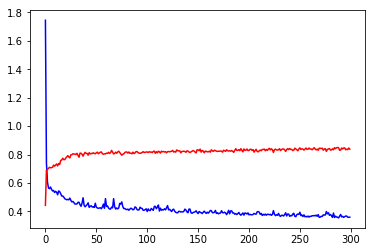

In [23]:
plt.plot(range(300),history.history.get('loss'),c='b') 
plt.plot(range(300),history.history.get('acc'),c='r') 